In [23]:
!pip install pandas numpy prophet matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
data = pd.read_csv('gold.csv')
data = data[['Date', 'Close']]
data.columns = ['ds', 'y']
print(data.head())


           ds      y
0  2000-01-04  283.7
1  2000-01-05  282.1
2  2000-01-06  282.4
3  2000-01-07  282.9
4  2000-01-10  282.7


In [13]:
import prophet
model = prophet.Prophet()


In [14]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=30*365)
print(future.tail())


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc42zeo9v/73n9t94g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc42zeo9v/1vnu32fe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53612', 'data', 'file=/tmp/tmpc42zeo9v/73n9t94g.json', 'init=/tmp/tmpc42zeo9v/1vnu32fe.json', 'output', 'file=/tmp/tmpc42zeo9v/prophet_model6ir0fk2b/prophet_model-20240710125954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:59:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:59:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


              ds
16648 2052-08-21
16649 2052-08-22
16650 2052-08-23
16651 2052-08-24
16652 2052-08-25


In [15]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())



              ds         yhat   yhat_lower    yhat_upper
16648 2052-08-21  6832.023809 -8743.379619  21494.233365
16649 2052-08-22  6832.922443 -8804.061803  21535.836373
16650 2052-08-23  6833.917063 -8710.425780  21471.570064
16651 2052-08-24  6836.790312 -8672.162120  21442.094500
16652 2052-08-25  6837.752730 -8702.802496  21486.112964


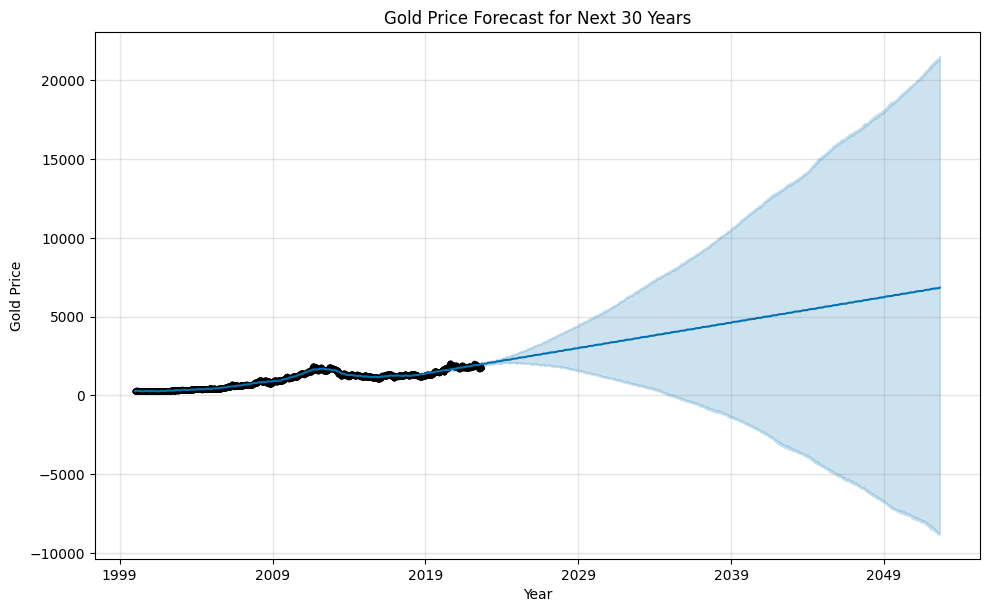

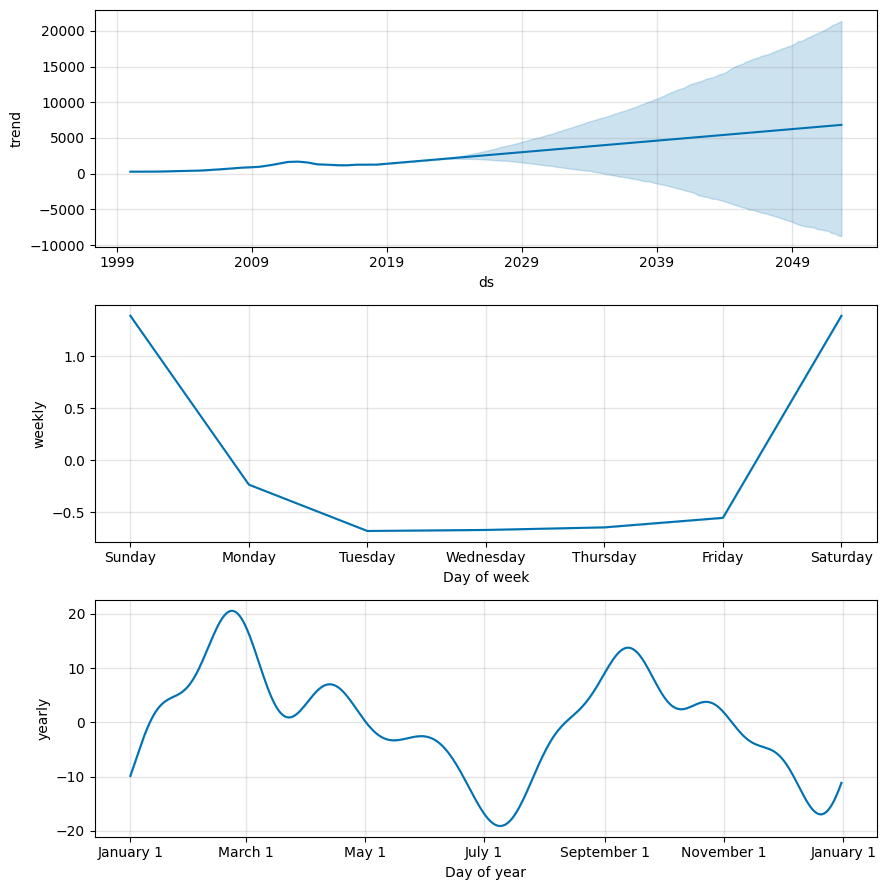

In [16]:

fig1 = model.plot(forecast)
plt.title('Gold Price Forecast for Next 30 Years')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

In [19]:
import plotly.express as px
fig = px.scatter_3d(
    forecast, x='ds', y='yhat', z='yhat_lower',
    color='yhat_upper', size='yhat_upper', size_max=18,
    title='4D Plot of Predicted Gold Prices',
    labels={'ds': 'Date', 'yhat': 'Predicted Price', 'yhat_lower': 'Lower Prediction Bound'},
)

fig.show()